# Keyword Search

In this lesson, you will learn how to use keyword search to answer questions using a database. 
Search is crucial to how we navigate the world. This includes search engines, but it also includes search within apps, so when you search Spotify or YouTube or Google Maps for example. Companies and organizations also need to use keyword search or various methods of search to search their internal documents. Keyword search is the method most commonly used to build search systems. 


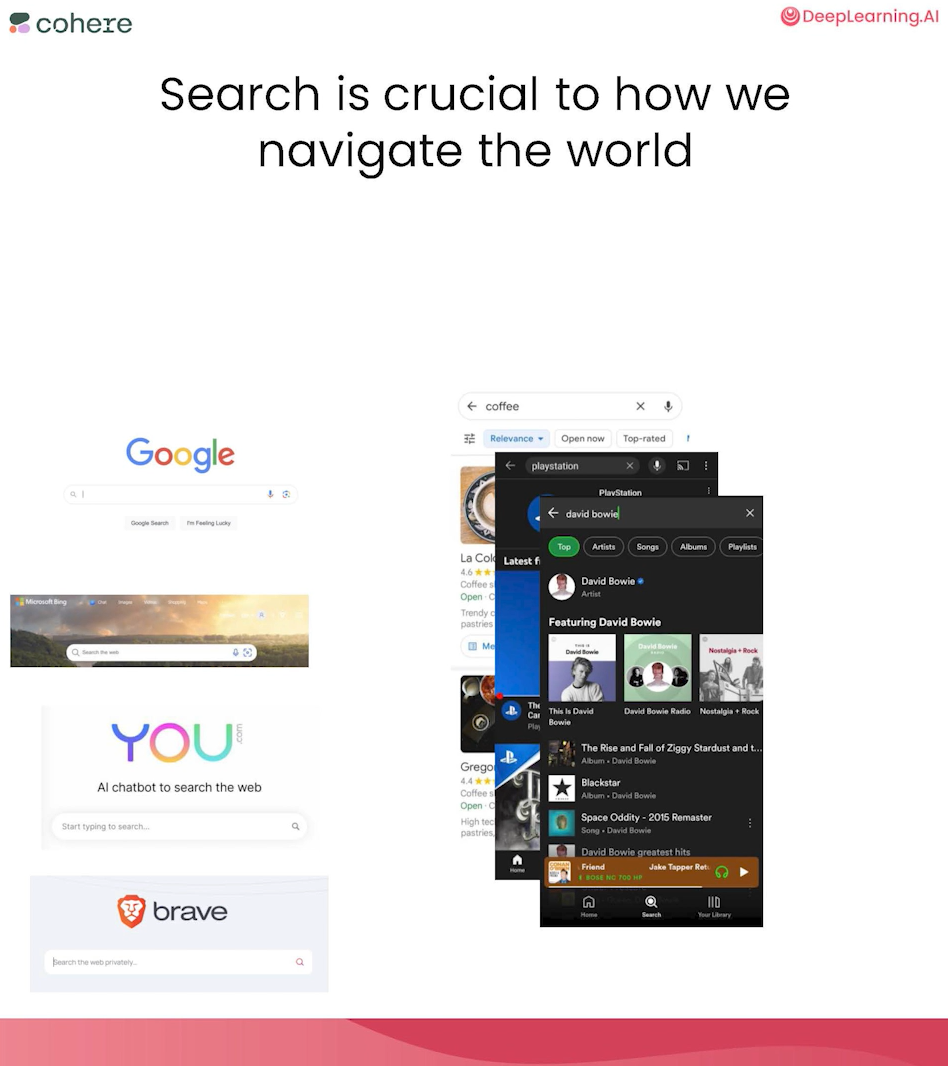

## Setup

Load needed API keys and relevant Python libaries.

In [ ]:
# !pip install cohere
# !pip install weaviate-client

In [ ]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

Let's start by imporing Weaviate to access the Wikipedia database.

In [ ]:
import weaviate
auth_config = weaviate.auth.AuthApiKey(
    api_key=os.environ['WEAVIATE_API_KEY'])

In [ ]:
# 76320a90-53d8-42bcb41d-678647c6672e

We can import Weaviate. This will allow us to connect to an online database. We'll talk about this database. Let's talk about what Weaviate is. 

Weaviate is an open source database. It has keyword search capabilities, but also vector search capabilities that rely on language models. 

The API key we'll be using here is public, this is part of a public demo, so the actual key is not a secret and you can use it and we encourage you to use it to access this demo database.

In [ ]:
client = weaviate.Client(
    url=os.environ['WEAVIATE_API_URL'],
    auth_client_secret=auth_config,
    additional_headers={
        "X-Cohere-Api-Key": os.environ['COHERE_API_KEY'],
    }
)

Now that we've set the configurations for authentication, let's look at this code that connects the client to the actual database. 

Now this database is a public database and it contains 10 million records. These are records from Wikipedia. Each cell, each record, a row in this database, is a passage, is a paragraph from Wikipedia. These 10 million records are from 10 different languages. 

So one million of them are in English and the other nine million are in different languages. And we can choose and filter which language we want to query, and we'll see that later in this lab. 

After we run this line of code, we make sure that the client is ready and connected. And if we get true, then that means that our local Weaviate client is able to connect to the remote Weaviate database. And then now we're able to do a keyword search on this data set. 

In [ ]:
client.is_ready()

*OUTPUT*
```
True
```

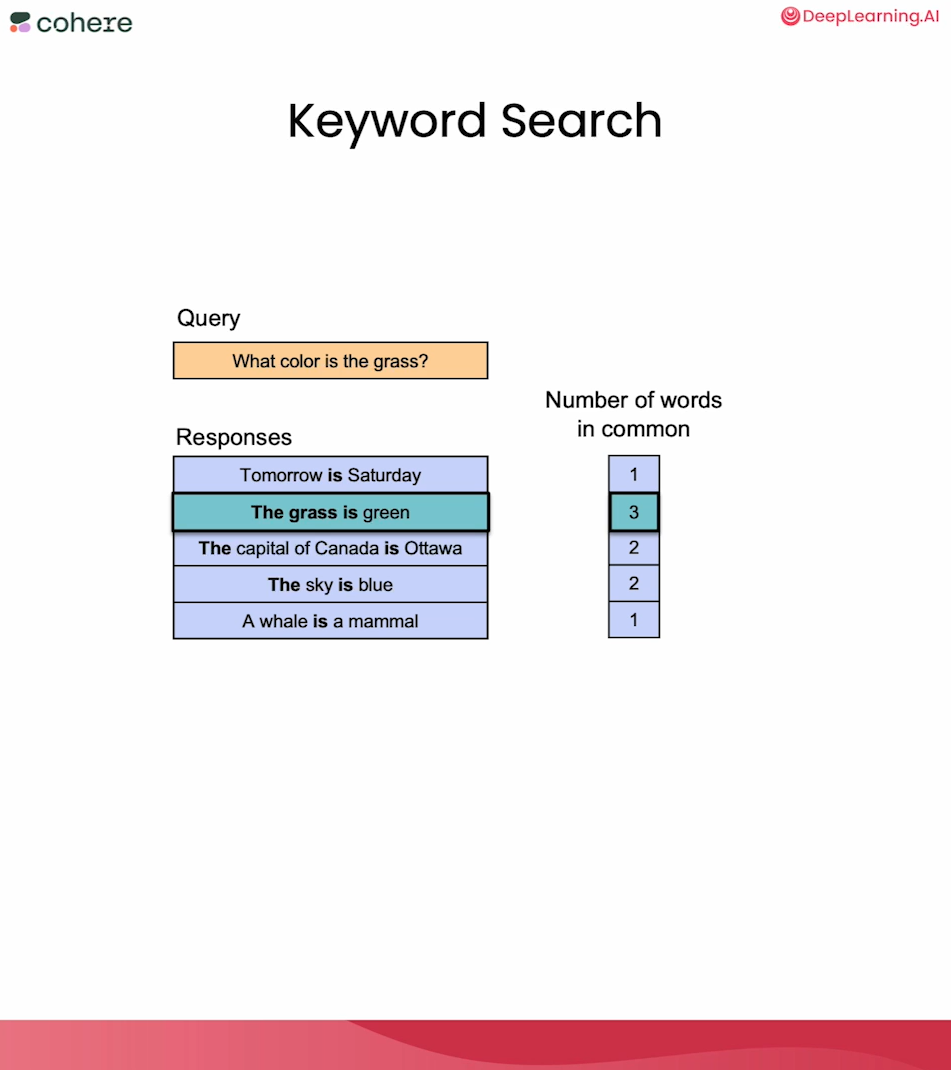

So let's say you have the query, what color is the grass? And you're searching a very small archive that has these five texts, these five sentences. One says tomorrow is Saturday, one says the grass is green, the capital of Canada is Ottawa, the sky is blue, and a whale is a mammal. 

So this is a simple example of search. A high-level look at how keyword search works is to compare how many words are in common between the query and the documents. So if we compare how many words are in common between the query and the first sentence, they only share the word is. And so that's one word they have in common. And we can see the counts of every sentence in this archive. We can see that the second sentence has the most words in common with the query, and so keyword search might retrieve that as the answer.

# Keyword Search

In [ ]:
def keyword_search(query,
                   results_lang='en',
                   properties = ["title","url","text"],
                   num_results=3):

    where_filter = {
    "path": ["lang"],
    "operator": "Equal",
    "valueString": results_lang
    }
    
    response = (
        client.query.get("Articles", properties)
        .with_bm25(
            query=query
        )
        .with_where(where_filter)
        .with_limit(num_results)
        .do()
        )

    result = response['data']['Get']['Articles']
    return result

 So now that we're connected to the database, let's build out the function that will query it. Let's call it "keyword_search" and we'll be building this and going back and forth. So the simplest thing we'll need to do here is to say "response = (" and then "client.query.get". Now everything we're doing here, this is Weaviate. So this is all defined by the Weaviate API. And it tells us the kind of data, I think the collection we need to add here is called articles. So that's defined in that database. And since we want to do keyword search, let's say before we go into keyword search, let's copy what these properties are like. So these will be, let's say, a list defined with this data set, like this. Every article in this database has a number of properties. 



What we're saying here is that the results for this search, we want you to return to us the title, the URL, and the text for each result. There are other properties in here, but we don't want the database to return them to us now. Now to do the keyword search part, Weaviate has us type ".with_bm25", and bm25 is this keyword search or lexical search algorithm commonly used, and it scores the documents in the archive versus the query based on a specific formula that looks at the count of the shared words between the query and each document and the way we need to do this is to say "query=query" we will pass to you and the query we need to add to this function so it is a parameter here as well. 



A couple more lines we need to pass to alleviate our ".with_where", so we can have a where clause here that is formatted in a specific way. So what we want to do here is limit this to only English results. And results slang will be something we also add to this definition. So let's say "en". By default, we'll filter by the English language and only look at the English language articles. So that's why we're adding it here as a default, but it's something we can change whenever we call the keyword search method. 

Now one more line we need to add is to say ".with_limit". So how many results do we want the search engine to retrieve to us? So, we say "num_results" and then we define that here as well, so "num_results". And let's set that by default to say 3. And with that, our query is complete and we just say do and then we close that request. And once we've completed this, we can now get the response and return the result. 

In [ ]:
query = "What is the most viewed televised event?"
keyword_search_results = keyword_search(query)
print(keyword_search_results)

*OUTPUT*
```
[{'text': 'The most active Gamergate supporters or "Gamergaters" said that Gamergate was a movement for ethics in games journalism, for protecting the "gamer" identity, and for opposing "political correctness" in video games and that any harassment of women was done by others not affiliated with Gamergate. They argued that the close relationships between journalists and developers demonstrated a conspiracy among reviewers to focus on progressive social issues. Some supporters pointed to what they considered disproportionate praise for games such as "Depression Quest" and "Gone Home", which feature unconventional gameplay and stories with social implications, while they viewed traditional AAA games as downplayed. False claims of the "ethics in game journalism" had started as early as 2012, when Geoff Keighley was accused of such unethical behavior when he was presenting information about "Halo 4" among advertisements for Mountain Dew and Doritos, an event called "Doritosgate" in the gamer culture.', 'title': 'Gamergate (harassment campaign)', 'url': 'https://en.wikipedia.org/wiki?curid=43758363'}, {'text': '"Rolling Stone" stated Jackson\'s Super Bowl performance "is far and away the most famous moment in the history of the Super Bowl halftime show". "PopCrush" called the performance "one of the most shocking moments in pop culture" as well as a "totally unexpected and unforgettable moment". "Gawker" ranked the performance among the most recent of the "10 Shows that Advanced Sex on Television", commenting the set "had all the elements of a huge story" and "within seconds the world searched furtively for pictures", concluding "it remains so ubiquitous, it\'s impossible to look at a starburst nipple shield without thinking "Janet Jackson"". "E! Online" ranked it among the top ten most shocking celebrity moments of the prior two decades. A study of television\'s most impactful moments of the last 50 years conducted by Sony Electronics and the Nielsen Television Research Company ranked Jackson\'s Super Bowl performance at #26. The incident was the only Super Bowl event on the list and the highest music and entertainment event aside from the death of Whitney Houston. TV Guide Network ranked it at #2 in a 2010 special listing the "25 Biggest TV Blunders". "Complex" stated "It\'s the Citizen Kane of televised nip-slips—so unexpected, and on such a large stage, that nothing else will ever come close. If Beyoncé were to whip out both breasts and put on a puppet show with them when she performs this year in New Orleans, it would rate as just the second most shocking Super Boob display. Janet\'s strangely ornamented right nipple is a living legend, and so is Justin Timberlake\'s terrified reaction." Music channel Fuse listed it as the most controversial Super Bowl halftime show, saying the "revealing performance remains (and will forever remain) the craziest thing to ever happen at a halftime show. Almost immediately after the incident, the FCC received a flood of complaints from parents who just wanted their children to enjoy a nice, wholesome three hours of grown men inflicting damaging and long-lasting pain on each other for sport. Halftime shows would never be the same." Patrick Gipson of "Bleacher Report" ranked it as #1 in its list of the most "Jaw Dropping Moments of the Last Decade", stating Janet "changed the landscape of live television forever". Gipson explained "It prompted a million mothers to cover their eyes, fathers and sons to jump out of their seats in shock and numerous sanctions by the Federal Communications Commission, including a US550,000 fine against CBS. Talk about a halftime show that will be hard to top." The incident was also declared "the most memorable Super Bowl halftime show in history", as well as "the most controversial", adding "you can\'t talk about this halftime show, or any subsequent halftime show from here to eternity, without mentioning the wardrobe malfunction".', 'title': 'Super Bowl XXXVIII halftime show controversy', 'url': 'https://en.wikipedia.org/wiki?curid=498971'}, {'text': 'West Germany (established in May 1949) was not eligible for the 1950 World Cup (the first after the war), and so all preparations were made with a view toward the 1954 matches in Bern, Switzerland. By that time Adidas\'s football boots were considerably lighter than the ones made before the war, based on English designs. At the World Cup Adi had a secret weapon, which he revealed when West Germany made the finals against the overwhelmingly favored Hungarian team, which was undefeated since May 1950 and had defeated West Germany 8–3 in group play. Despite this defeat, West Germany made the knock-out rounds by twice defeating Turkey handily. The team defeated Yugoslavia and Austria to reach the final (a remarkable achievement), where the hope of many German fans was simply that the team "avoid another humiliating defeat" at the hands of the Hungarians. The day of the final began with light rain, which brightened the prospects of the West German team who called it ""Fritz Walter-Wetter"" because the team\'s best player excelled in muddy conditions. Dassler informed Herberger before the match of his latest innovation—"screw in studs." Unlike the traditional boot which had fixed leather spike studs, Dassler\'s shoe allowed spikes of various lengths to be affixed depending on the state of the pitch. As the playing field at Wankdorf Stadium drastically deteriorated, Herberger famously announced, "Adi, screw them on." The longer spikes improved the footing of West German players compared to the Hungarians whose mud-caked boots were also much heavier. The West Germans staged a come from behind upset, winning 3-2, in what became known as the "Miracle in Bern." Herberger publicly praised Dassler as a key contributor to the win, and Adidas\'s fame rose both in West Germany, where the win was considered a key post-war event in restoring German self-esteem and abroad, where in the first televised World Cup final viewers were introduced to "the ultimate breakthrough."', 'title': 'Adolf Dassler', 'url': 'https://en.wikipedia.org/wiki?curid=2373164'}]
```

### Try modifying the search options
- Other languages to try: `en, de, fr, es, it, ja, ar, zh, ko, hi`

In [ ]:
properties = ["text", "title", "url", 
             "views", "lang"]

So let's define a function that prints it in maybe a better way. And this function can look like this "print_result". 

This is the list of properties that this data set was built using and so these are all columns that are stored within the database. So you can say you're gonna look at how many views a Wikipedia page received. You can use that to filter or sort. This is an estimated figure but then this is the language column that we use to filter, and you can use other values for language.

The codes for the other languages look like this. So we have English, German, French, Spanish, Italian, Japanese, Arabic, Chinese, Korean, and Hindi, I believe. So just input one of these and pass it to the keyword search, and it will give you results in that language. Let's see how we can query the database with a different language. 

In [ ]:
def print_result(result):
    """ Print results with colorful formatting """
    for i,item in enumerate(result):
        print(f'item {i}')
        for key in item.keys():
            print(f"{key}:{item.get(key)}")
            print()
        print()

In [ ]:
print_result(keyword_search_results)

*OUTPUT*
```
item 0
text:The most active Gamergate supporters or "Gamergaters" said that Gamergate was a movement for ethics in games journalism, for protecting the "gamer" identity, and for opposing "political correctness" in video games and that any harassment of women was done by others not affiliated with Gamergate. They argued that the close relationships between journalists and developers demonstrated a conspiracy among reviewers to focus on progressive social issues. Some supporters pointed to what they considered disproportionate praise for games such as "Depression Quest" and "Gone Home", which feature unconventional gameplay and stories with social implications, while they viewed traditional AAA games as downplayed. False claims of the "ethics in game journalism" had started as early as 2012, when Geoff Keighley was accused of such unethical behavior when he was presenting information about "Halo 4" among advertisements for Mountain Dew and Doritos, an event called "Doritosgate" in the gamer culture.

title:Gamergate (harassment campaign)

url:https://en.wikipedia.org/wiki?curid=43758363


item 1
text:"Rolling Stone" stated Jackson's Super Bowl performance "is far and away the most famous moment in the history of the Super Bowl halftime show". "PopCrush" called the performance "one of the most shocking moments in pop culture" as well as a "totally unexpected and unforgettable moment". "Gawker" ranked the performance among the most recent of the "10 Shows that Advanced Sex on Television", commenting the set "had all the elements of a huge story" and "within seconds the world searched furtively for pictures", concluding "it remains so ubiquitous, it's impossible to look at a starburst nipple shield without thinking "Janet Jackson"". "E! Online" ranked it among the top ten most shocking celebrity moments of the prior two decades. A study of television's most impactful moments of the last 50 years conducted by Sony Electronics and the Nielsen Television Research Company ranked Jackson's Super Bowl performance at #26. The incident was the only Super Bowl event on the list and the highest music and entertainment event aside from the death of Whitney Houston. TV Guide Network ranked it at #2 in a 2010 special listing the "25 Biggest TV Blunders". "Complex" stated "It's the Citizen Kane of televised nip-slips—so unexpected, and on such a large stage, that nothing else will ever come close. If Beyoncé were to whip out both breasts and put on a puppet show with them when she performs this year in New Orleans, it would rate as just the second most shocking Super Boob display. Janet's strangely ornamented right nipple is a living legend, and so is Justin Timberlake's terrified reaction." Music channel Fuse listed it as the most controversial Super Bowl halftime show, saying the "revealing performance remains (and will forever remain) the craziest thing to ever happen at a halftime show. Almost immediately after the incident, the FCC received a flood of complaints from parents who just wanted their children to enjoy a nice, wholesome three hours of grown men inflicting damaging and long-lasting pain on each other for sport. Halftime shows would never be the same." Patrick Gipson of "Bleacher Report" ranked it as #1 in its list of the most "Jaw Dropping Moments of the Last Decade", stating Janet "changed the landscape of live television forever". Gipson explained "It prompted a million mothers to cover their eyes, fathers and sons to jump out of their seats in shock and numerous sanctions by the Federal Communications Commission, including a US550,000 fine against CBS. Talk about a halftime show that will be hard to top." The incident was also declared "the most memorable Super Bowl halftime show in history", as well as "the most controversial", adding "you can't talk about this halftime show, or any subsequent halftime show from here to eternity, without mentioning the wardrobe malfunction".

title:Super Bowl XXXVIII halftime show controversy

url:https://en.wikipedia.org/wiki?curid=498971


item 2
text:West Germany (established in May 1949) was not eligible for the 1950 World Cup (the first after the war), and so all preparations were made with a view toward the 1954 matches in Bern, Switzerland. By that time Adidas's football boots were considerably lighter than the ones made before the war, based on English designs. At the World Cup Adi had a secret weapon, which he revealed when West Germany made the finals against the overwhelmingly favored Hungarian team, which was undefeated since May 1950 and had defeated West Germany 8–3 in group play. Despite this defeat, West Germany made the knock-out rounds by twice defeating Turkey handily. The team defeated Yugoslavia and Austria to reach the final (a remarkable achievement), where the hope of many German fans was simply that the team "avoid another humiliating defeat" at the hands of the Hungarians. The day of the final began with light rain, which brightened the prospects of the West German team who called it ""Fritz Walter-Wetter"" because the team's best player excelled in muddy conditions. Dassler informed Herberger before the match of his latest innovation—"screw in studs." Unlike the traditional boot which had fixed leather spike studs, Dassler's shoe allowed spikes of various lengths to be affixed depending on the state of the pitch. As the playing field at Wankdorf Stadium drastically deteriorated, Herberger famously announced, "Adi, screw them on." The longer spikes improved the footing of West German players compared to the Hungarians whose mud-caked boots were also much heavier. The West Germans staged a come from behind upset, winning 3-2, in what became known as the "Miracle in Bern." Herberger publicly praised Dassler as a key contributor to the win, and Adidas's fame rose both in West Germany, where the win was considered a key post-war event in restoring German self-esteem and abroad, where in the first televised World Cup final viewers were introduced to "the ultimate breakthrough."

title:Adolf Dassler

url:https://en.wikipedia.org/wiki?curid=2373164
```

I'm going to be using, let's say, German.

And we did German here because some words might be shared and we can see here some results. So this result for the most televised event is for Busta Rhymes, the musician. But you can see why it brought this as a result, right? Because the word event is here. And then the name of the album mentioned here is event. So the text here and the query that we have shared, they don't have to share all of the keywords but at least some of them. BM25 only needs one word to be shared for it to score that as somewhat relevant. And the more words the query and the document share, the more it's repeated in the document, the higher the score is. But we can see in general, while these results are returned, this is maybe not the best, most relevant answer to this question or document that is most relevant to this query. We'll see how language models help with this.

In [ ]:
query = "What is the most viewed televised event?"
keyword_search_results = keyword_search(query, results_lang='de')
print_result(keyword_search_results)

*OUTPUT*
```
item 0
text:Das nächste Album "Extinction Level Event: The Final World Front", dessen Titel vom Film "Deep Impact" inspiriert war, enthielt die Single "Gimme Some More", die im Januar 1999 Platz 5 der britischen Charts belegte. Mit Janet Jackson sang er außerdem den Erfolgshit "What’s It Gonna Be?!"

title:Busta Rhymes

url:https://de.wikipedia.org/wiki?curid=238582


item 1
text:Der Begriff Strukturalismus ist vom Wort Struktur abgeleitet und wurde vereinzelt seit Mitte des 19. Jahrhunderts verwendet. In der Psychologie wurde er 1907 von James Rowland Angell in einem Aufsatz über Edward Bradford Titchener eingeführt. In der Sprach- und Literaturwissenschaft wurde er seit den 1920er vom Prager linguistischen Kreis verwendet. Dort knüpfte Roman Jakobson an die Schule des Russischen Formalismus an und verwendete den Begriff „Strukturalismus“ erstmals 1929 in einem in der Prager Zeitschrift "Čin" auf Tschechisch unter dem Titel "Romantischer Panslawismus – neue Slawistik" ("Romantické všeslovanství — nová slávistika") veröffentlichten Aufsatz:Were we to comprise the leading idea of present-day science in its most various manifestations, we could hardly find a more appropriate designation than structuralism. Any set of phenomena examined by contemporary science is treated not as a mechanical agglomeration but as a structural whole, and the basic task is to reveal the inner, whether static or developmental, laws of this system. What appears to be the focus of scientific preoccupations is no longer the outer stimulus, but the internal premises of the development; now the mechanical conception of processes yields to the question of their functions.

title:Strukturalismus

url:https://de.wikipedia.org/wiki?curid=88840


item 2
text:Summer of Soul (…Or, When the Revolution Could Not Be Televised) – David Dinerstein, Robert Fyvolent, Joseph Patel und Ahmir „Questlove“ Thompson

title:Oscarverleihung 2022

url:https://de.wikipedia.org/wiki?curid=11922735
```

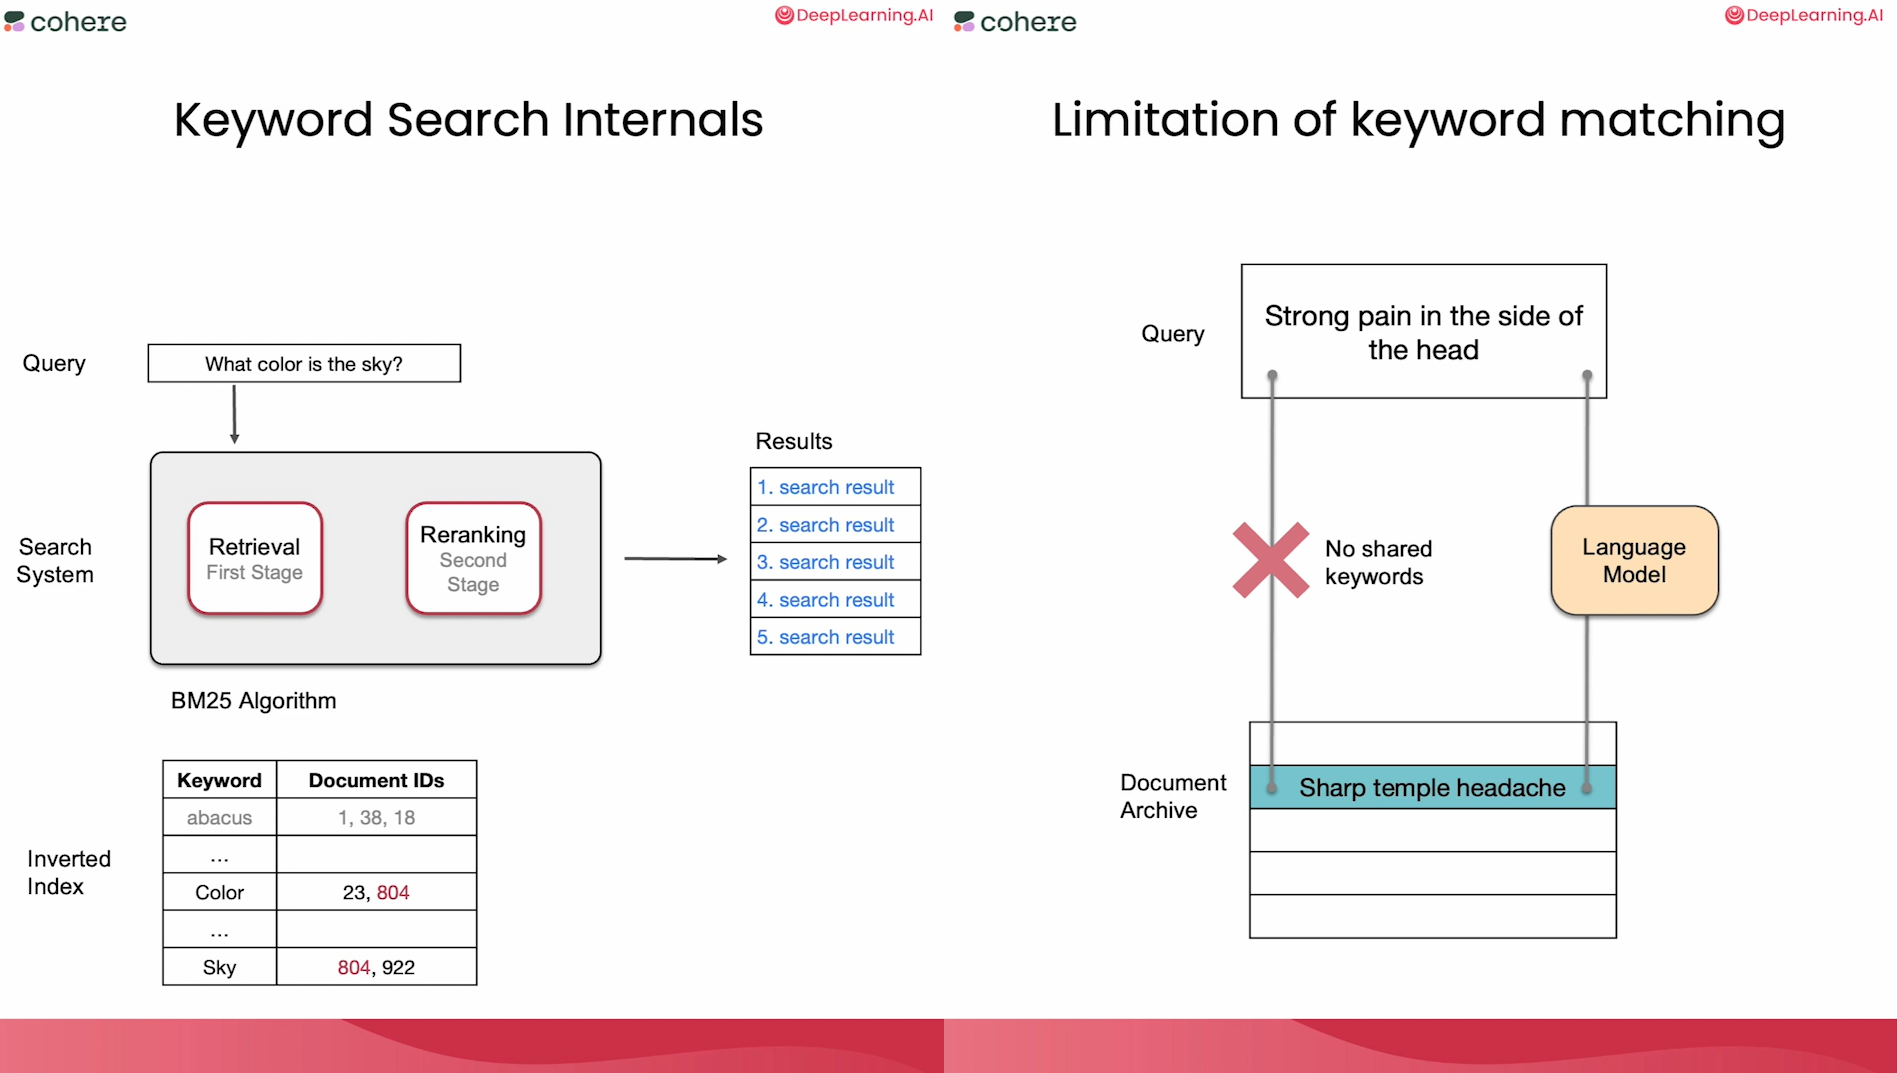

The major components are the query, the search system, the search system has access to a document archive that it processed beforehand, and then in response to the query the system gives us a list of results ordered by the most relevant to the query. If we look a little bit more closely, we can think of search systems as having multiple stages. The first stage is often a retrieval or a search stage, and there's another stage after it called re-ranking.  Re-ranking is often needed because we want to involve or include additional signals rather than just text relevance. The first stage, the retrieval, commonly uses the BM25 algorithm to score the documents in the archive versus the query. The implementation of the first stage retrieval often contains this idea of an inverted index. 

Notice that this table is a little bit different than the table we showed you before of the documents. The inverted index is this kind of table that has kind of these two columns. One is the keyword, and then next to the keyword is the documents that this keyword is present in. This is done to optimize the speed of the search. When you enter a query into a search engine, you expect the results in a few milliseconds. This is how it's done. 

In practice, in addition to the document ID, the frequency of how many times this keyword appears is also added to this call. With this, you now have a good high-level overview of keyword search. Now, notice for this query, what color is the sky, when we look at the inverted index, the word color has the document 804, and the word sky also has the document 804. So 804 will be highly rated from the results that are retrieved in the first stage. From our understanding of keyword search, we can see some of the limitations. So, let's say we have this query, strong pain in the side of the head. If we search a document archive that has this other document that answers it exactly, but it uses different keywords, so it doesn't use them exactly, it says sharp temple headache, keyword search is not going to be able to retrieve this document. 

This is an area where language models can help, because they're not comparing keywords simply. They can look at the general meaning and they're able to retrieve a document like this for a query like this. Language models can improve both search stages and in the next lessons, we'll look at how to do that. We'll look at how language models can improve the retrieval or first stage using embeddings, which are the topic of the next lesson. And then we'll look at how re-ranking works and how it can improve the second stage. And at the end of this course, we'll look at how large language models can generate responses as informed by a search step that happens beforehand. So let's go to the next lesson and learn about embeddings.

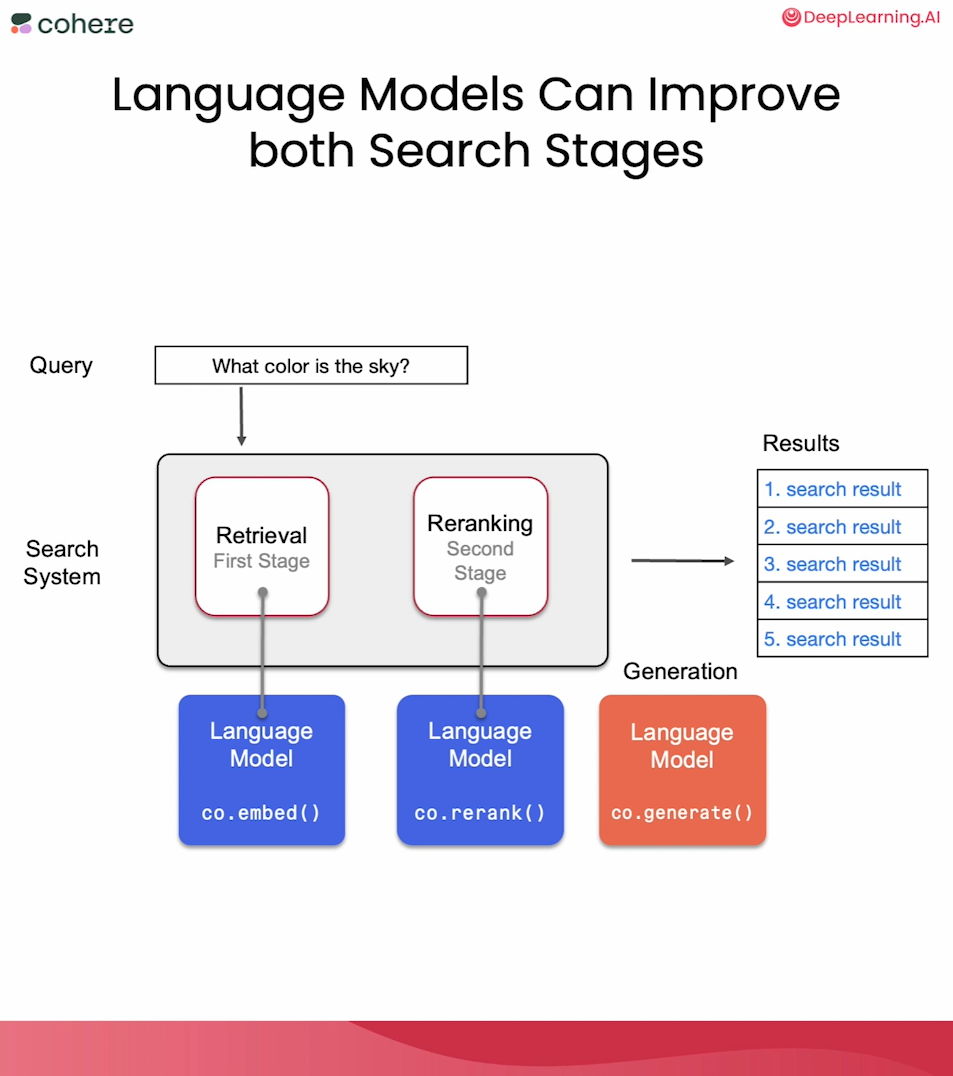

## How to get your own API key

For this course, an API key is provided for you.  If you would like to develop projects with Cohere's API outside of this classroom, you can register for an API key [here](https://dashboard.cohere.ai/welcome/register?utm_source=partner&utm_medium=website&utm_campaign=DeeplearningAI).